**Determining the market price of a house given a set of features**

In [159]:
# importing necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import seaborn as sns
import requests

In [160]:
# download dataset from data repository
async def downloadFile(url, filename):
  response = requests.get(url)
  if response.status_code == 200:
    with open(filename, "wb") as file:
      file.write(response.content)
      print(f"Downloaded {filename} successfully")
  else:
    print('Download failed')
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
filename="housing.csv"
await downloadFile(url, filename)

Downloaded housing.csv successfully


In [161]:
# reading data using pandas modules
file_path = "/content/housing.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [162]:
# print the data types of each column
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [163]:
# statistical summary
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [164]:
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [165]:
# sum of misisng vlaues
print('Number of NaN vlaues for the columns bedrooms', df['bedrooms'].isnull().sum())
print('Number of NaN values for the columns bathrooms', df['bathrooms'].isnull().sum())

Number of NaN vlaues for the columns bedrooms 13
Number of NaN values for the columns bathrooms 10


In [166]:
# replace missing values of bedroom with mean values
avg_bedroom = df['bedrooms'].mean()
df['bedrooms'].replace(np.NaN, avg_bedroom, inplace=True)

In [167]:
# replace missing value of bathroom with mean their values
avg_bathroom = df['bathrooms'].mean()
df['bathrooms'].replace(np.NaN, avg_bathroom, inplace=True)

**Exploratory Data Analysis**

In [168]:
df['floors'].value_counts()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [169]:
no_of_houses_uniques_floor = df['floors'].value_counts().to_frame()
no_of_houses_uniques_floor

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

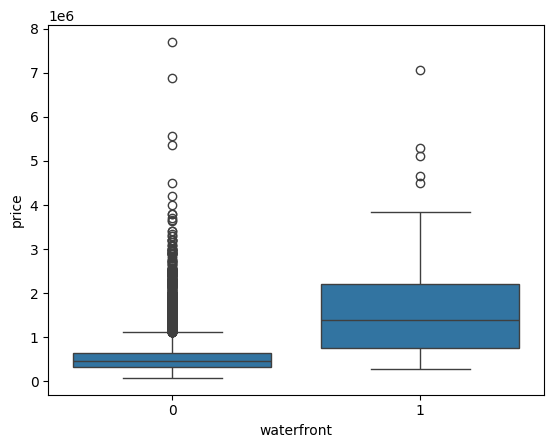

In [170]:
sns.boxplot(x='waterfront', y='price', data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

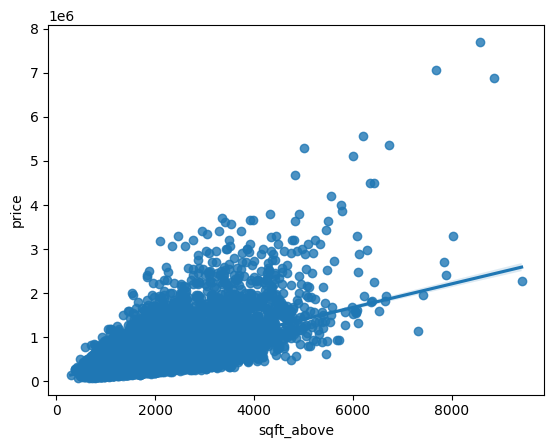

In [171]:
sns.regplot(x='sqft_above', y='price', data=df)

In [172]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [173]:
df.corr()['price'].sort_values()

,price
zipcode,-0.053203
date,-0.004357
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369


**Model Development**

In [174]:
x = df[['long']]
y = df[['price']]
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [175]:
lm.score(x, y)

0.00046769430149007363

In [176]:
# regression model to predict the price using sqft_living'
x1 = df[['sqft_living']]
y1 = df[['price']]
lm1 = LinearRegression()
lm1.fit(x1, y1)

LinearRegression()

In [177]:
# coefficient of determination i.e R^2
lm1.score(x1, y1)

0.4928532179037931

In [178]:
# Multiple linear regression
lm2 = LinearRegression()
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm2.fit(features, df['price'])

LinearRegression()

In [179]:
# coefficient of determination i.e. R^2
lm2.score(features, df[['price']])

0.6576861682430691

In [180]:
pr= PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [181]:
z_pr = pr.fit_transform(features)

In [182]:
features.shape

(21613, 11)

In [183]:
z_pr.shape

(21613, 78)

In [184]:
#pipeline
input = [('scale', StandardScaler()), ('polyomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [185]:
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polyomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [186]:
features = features.astype(float)
pipe.fit(features, df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polyomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [187]:
ypipe = pipe.predict(features)
ypipe[0:4]

array([349718., 559196., 449622., 393470.])

In [188]:
# R^2
pipe.score(features, df['price'])

0.7513388843959332

**Model Evaluation and Refinement**

In [189]:
# split data into training and testing sets

x = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

print('Number of test samples:', x_test.shape[0])
print('Number of training samples:', x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


In [190]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [191]:
RidgeModel.score(x_test, y_test)

0.6478759163939112

In [192]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [193]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [194]:
# polynomial fetures ridge score
RidgeModel.score(x_test_pr, y_test)

0.7002744273539745